# 深度神经网络入门 --实践

## 1. 神经元
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_18_2021_11_01_11_3CIDZe.jpg)

面向对象的思维

单个神经元的
- 属性有哪些?
- 功能有什么?

### 先加权求和

In [196]:
x1 = 0.1
x2 = 0.5
x3 = 0.8

In [197]:
# 也可以这样， 一次性赋值
w1, w2, w3 = 2, 1, 0.5

In [198]:
b = 2.5

In [199]:
z = w1 * x1 + w2*x2 + w3*x3 + b

In [200]:
print(z)

3.6


In [201]:
# 第三方库的导入
# 简化一点
import numpy as np

[![](https://numpy.org/doc/stable/_static/numpylogo.svg)](https://numpy.org/doc/stable/user/whatisnumpy.html)

《天才基本法》

In [202]:
x = np.array([x1, x2, x3])
w = np.array([w1, w2, w3])
print(x)
print(w)

[0.1 0.5 0.8]
[2.  1.  0.5]


In [203]:
z = np.dot(x, w) + b
print(z)

3.6


### 说明文档
`numpy.dot`的[参考说明](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

- 分一维和二维
- 不用记忆

In [204]:
# help(np.dot)
# np.dot()

### 激活函数

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [205]:
# 函数定义
def sigmoid(z):
    """Sigmoid 激活函数"""
    return 1.0/(1.0+np.exp(-z))

In [206]:
# 列表: 画出激活函数的图像
z_s = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [207]:
# 新建空的列表
a_s = []

In [208]:
# 取 z_s 里面的每一个数(第1个， 第3个， 最后一个， 倒数第2个， 从第二个开始到最后)
z_s[-2]

4

In [209]:
# 循环: 方法1
# 取 z_s 里面的每一个数
for z in z_s:
    print(z)

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [210]:
# 循环
for z in z_s:
    a = sigmoid(z)
    print(a)

0.0066928509242848554
0.01798620996209156
0.04742587317756678
0.11920292202211755
0.2689414213699951
0.5
0.7310585786300049
0.8807970779778823
0.9525741268224334
0.9820137900379085
0.9933071490757153


In [211]:
# 循环: 方法2, 用索引号
# 取 z_s 里面的每一个数
num = len(z_s)
for i in range(num):
    print(z_s[i])

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [212]:
for z in z_s:
    a = sigmoid(z)
    a_s.append(a)

In [213]:
a_s

[0.0066928509242848554,
 0.01798620996209156,
 0.04742587317756678,
 0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334,
 0.9820137900379085,
 0.9933071490757153]

### 作图
[<img src='https://matplotlib.org/_static/images/logo2.svg' width='40%'>](https://matplotlib.org/)

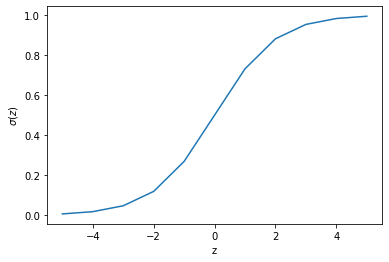

In [214]:
import matplotlib.pyplot as plt 
plt.plot(z_s, a_s)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.show()

In [215]:
# 简化一点: 不用循环
# 利用Numpy这种element-wize的计算特性

In [217]:
z_s = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

In [218]:
a_s = sigmoid(z_s)

In [219]:
print(a_s, type(a_s))

[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379 0.99330715] <class 'numpy.ndarray'>


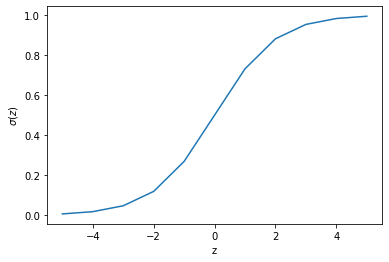

In [220]:
plt.plot(z_s, a_s)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.show()

In [221]:
## 综合一下: 单个神经元的计算
output = np.dot(x, w) + b

In [222]:
output

3.6

In [223]:
output = sigmoid(np.dot(x, w) + b)

In [224]:
print(output)

0.973403006423134


###  面向对象的写法

In [225]:
# 定义神经元 类
class neuron:
    def __init__(self, x, w, b):
        self.x = x
        self.w = w
        self.b = b
    
    def out(self):
        return self.sigmoid(np.dot(self.w, self.x) + self.b)
    
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
        

In [226]:
# 人-> 小明， 实例化的过程
n1 = neuron(x=x, w=w, b=b)

In [227]:
n1.out()

0.973403006423134

# 2. 神经层
<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_18_22_nn.png' width='40%'/>

$$
\left[\begin{array}{l}a_{20} \\ a_{21}  \end{array}\right]= 
\sigma \left ( \left[\begin{array}{llll}
w_{00} & w_{01} & w_{02}\\ 
w_{10} & w_{11} & w_{12}\\ 
\end{array}\right]\left[\begin{array}{l}a_{10} \\ a_{11} \\ a_{12} \end{array}\right]+\left[\begin{array}{l}b_{20} \\ b_{21} \end{array}\right] \right )
$$

一层神经元的属性有哪些?

In [229]:
# 红色层(第二层)
w00, w01, w02 = 1, 2, 3
w10, w11, w12 = 2, 2, 2
w = np.array([[w00, w01, w02], [w10, w11, w12]])

In [230]:
w

array([[1, 2, 3],
       [2, 2, 2]])

In [231]:
# 上一层的输出
a10, a11, a12 = 1, 1 , 1
a1 = np.array([a10, a11, a12])

In [232]:
a1

array([1, 1, 1])

In [233]:
np.dot(w,a1)

array([6, 6])

In [234]:
b2 = np.array([1,2])

In [235]:
z2 = np.dot(w,a1) + b2

In [236]:
z2

array([7, 8])

In [237]:
a2 = sigmoid(z2)

In [239]:
a2

array([0.99908895, 0.99966465])

In [240]:
class layer:
    def __init__(self, x, w, b):
        self.x = x 
        self.w = w 
        self.b = b
    
    def out(self):
        return self.sigmoid(np.dot(self.w, self.x) + self.b)
    
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))

In [59]:
l = layer(x=a1, w=w, b=b2)

In [241]:
l.out()

array([0.99908895, 0.99966465])

## 3. 神经网络

In [242]:
class network:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
    
    # 前向传播
    def feedforward(self, a):
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b
            a = self.sigmoid(z)
        return a
    
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))

### 验证是否写正确了

In [244]:
#  网络结构 sizes = [3, 3, 3]
# 输入层
x = np.array([1,1,1])
a0 = x

In [245]:
# 第一层
w1 = np.array([[1, 2, 1], [2, 2, 2], [1,1,3]])
b1= np.array([1,1,2])
# 具体化
l_1 = layer(x=a0, w=w1, b=b1)
# 第一层输出
a1 = l_1.out()

In [246]:
# 第二层
w2 = np.array([[0.1, 0.2, 1], [2, 0.2, 2], [1,0.1,0.3]])
b2= np.array([1,1,2])
l_2 = layer(x=a1, w=w2, b=b2)
a_2 = l_2.out()

In [247]:
a_2

array([0.90873096, 0.99442909, 0.96748325])

In [248]:
## 用Network类去验证
weights = [w1, w2]
biases = [b1, b2]

In [249]:
nn = network(weights=weights, biases=biases)

In [251]:
x = np.array([1,1,1])
nn.feedforward(x)

array([0.90873096, 0.99442909, 0.96748325])

## 简化
希望可以指定网络结构， 自动生成所有的权重和偏置
<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_17_10_nn_.svg' width='20%'>

In [73]:
# NN structure
sizes = [5, 3, 2]

In [252]:
np.random.normal()

-0.4593620255488138

In [253]:
W1 = np.random.normal(size=(3,5))

In [254]:
W1

array([[ 0.79576015, -1.48012745, -0.49051378, -2.36963053, -0.69633974],
       [-0.98132934, -0.10531089, -0.33956929,  1.62936744,  2.09353624],
       [ 0.32229939, -0.06287341, -2.4055721 , -1.41413959, -0.58984132]])

In [255]:
W2 = np.random.normal(size=(2,3))

In [256]:
W2

array([[ 0.23486814,  0.92193383, -0.8703922 ],
       [ 0.24964484,  0.42856299, -1.55000353]])

In [257]:
# 所有的权值
weights = [W1, W2]

In [258]:
weights

[array([[ 0.79576015, -1.48012745, -0.49051378, -2.36963053, -0.69633974],
        [-0.98132934, -0.10531089, -0.33956929,  1.62936744,  2.09353624],
        [ 0.32229939, -0.06287341, -2.4055721 , -1.41413959, -0.58984132]]),
 array([[ 0.23486814,  0.92193383, -0.8703922 ],
        [ 0.24964484,  0.42856299, -1.55000353]])]

In [259]:
# 用循环完成一个列表
num_layers = len(sizes)
weights = [np.random.normal(size=(sizes[i], sizes[i-1])) for i in range(1, num_layers)]

In [260]:
weights

[array([[-0.19311164,  0.4957427 , -0.88795973, -0.84517772, -0.65954787],
        [-0.23737044, -0.8669039 , -1.26468493,  0.16478997,  2.26701695],
        [-0.6461239 ,  1.21348202,  0.25911487,  0.68827985,  0.53240554]]),
 array([[ 0.87132782, -2.52135427,  0.02542735],
        [ 1.7572131 , -0.95891441, -0.32156976]])]

In [261]:
biases = [np.random.normal(size=sizes[i]) for i in range(1, num_layers)]

In [262]:
biases

[array([-1.27311918,  0.08081692,  1.5181712 ]),
 array([ 0.64594921, -0.95220998])]

In [263]:
class network:
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    def feedforward(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))

In [266]:
# sizes = [5, 3, 2]
# sizes = [784, 30, 10]

In [267]:
nn = network(sizes = sizes)

In [269]:
nn.weights

[array([[-0.99134958,  0.28265828, -0.23062595,  0.65635087, -0.20679449],
        [-1.58564069,  0.41453509, -0.37286838, -0.24227441, -0.17734985],
        [ 2.14209898, -0.97787067, -0.23851831, -0.31078623, -0.86044522]]),
 array([[ 0.73813891, -1.31395967,  2.23025197],
        [ 1.13746747,  1.47413314,  0.199245  ]])]

In [270]:
nn.biases

[array([ 0.27742193, -0.77532036,  1.76716199]),
 array([-0.40383248,  0.06171502])]

In [271]:
nn.feedforward(a=np.ones(5))

array([0.84250262, 0.69494308])

至此神经网络的前向传播过程就完成了， 按照道理来说我们**有合适的weights和biases**就可以帮我们识别手写字符了。 

## 识别数字
我们先假设有这些合适的weights和biases。

In [273]:
# 加载数据 得到一张图片的数据
import gzip
import pickle
f = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
f.close()

In [274]:
# training_data
# type(training_data)
training_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [275]:
training_data[1]

array([5, 0, 4, ..., 8, 4, 8])

In [276]:
xs, ys  = training_data[0], training_data[1]

In [278]:
xs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [279]:
ys

array([5, 0, 4, ..., 8, 4, 8])

In [280]:
def one_hot(ys):
    b = np.zeros((ys.size, ys.max()+1))
    b[np.arange(ys.size),ys] = 1
    return b 

In [281]:
ys =  one_hot(ys = ys)

In [283]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [284]:
xs_test, ys_test  = test_data[0], one_hot(ys=test_data[1])

In [285]:
xs_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [286]:
ys_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

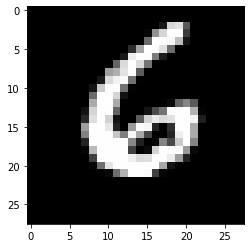

In [289]:
i = 90

x = training_data[0][i]
# 可视化这张图。是二维的，因此要重新排列数据
plt.imshow(x.reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [291]:
## 准备网络
net = network(sizes = [784, 30, 10])
# net.sizes
# net.num_layers
# net.biases
# net.weights

In [292]:
out = net.feedforward(x)

In [293]:
out

array([0.32631512, 0.94842614, 0.63925175, 0.13927663, 0.93020087,
       0.0406141 , 0.63373232, 0.44075381, 0.230999  , 0.12310638])

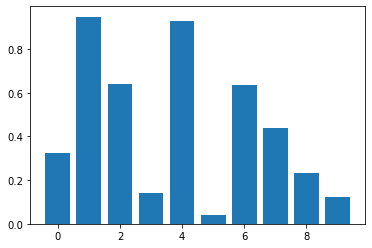

使用随机参数， 识别出的数字是: 1


In [294]:
plt.bar(np.arange(10),  out)
plt.show()
print('使用随机参数， 识别出的数字是: {}'.format(np.argmax(out)))

不对的原因是我们的权重和偏置是随机的， 接下来我们从某个地方拿到这组参数。

In [296]:
import pickle
with open('nn_model_weights.dat', "rb") as f:
    good_weights = pickle.load(f)

with open('nn_model_biases.dat', "rb") as f:
    Bs = pickle.load(f)
    good_biases = [B.flatten() for B in Bs]

In [297]:
len(good_weights)

2

In [298]:
good_weights[0].shape

(30, 784)

In [299]:
len(good_biases)

2

In [300]:
good_biases[0].shape

(30,)

In [301]:
len(net.weights)

2

In [302]:
net.weights[0].shape

(30, 784)

In [303]:
len(net.biases)

2

In [304]:
# 用最优的权重和偏置取替换掉原本随机的值
net.weights = good_weights
net.biases = good_biases

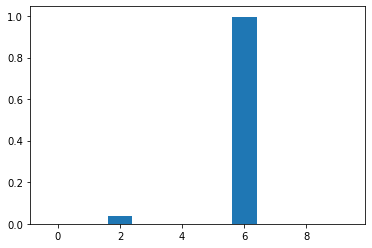

使用较好参数后， 识别出的数字是: 6


In [305]:
out = net.feedforward(x)
plt.bar(np.arange(10),  out)
plt.show()
print('使用较好参数后， 识别出的数字是: {}'.format(np.argmax(out)))

## 计算准确度( Accuracy)

$$
\text{acc} = \frac{\text{预测正确的图片数目}}{\text{预测图片数目}}
$$

In [306]:
class network:
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 计算准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc

In [309]:
net = network(sizes = [784, 30, 10])

In [310]:
# 随机参数时的准确度
net.acc(xs=xs_test, ys=ys_test)

0.0989

In [311]:
net.weights = good_weights
net.biases = good_biases

In [312]:
# 较优参数时的准确度
net.acc(xs=xs_test, ys=ys_test)

0.8955

## 找出这组好的参数
定义了一个损失函数:
$$
C(w, b) \equiv \frac{1}{n} \sum_{x} C_{x} = \frac{1}{2 n} \sum_{x}\|y(x)-a_{w,b}(x)\|^{2}
$$
我们的目的是找到这些好的参数, 满足:

$$
w^{*}, b^{*}=\arg \min _{w, b} C(w,b)
$$

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_17_15_grediant.png' width = '50%'/>

寻找的这些参数的方法是梯度下降, $v$是由所有的权重和偏置构成的一个高维的向量， 其改变的反向就是损失函数梯度下降的方向。

$$
v \rightarrow v^{\prime}=v-\eta \nabla C
$$

具体到其中的某一个分量的更新方法是,

$$
w_{k} \rightarrow w_{k}^{\prime}=w_{k}-\eta \frac{\partial C}{\partial w_{k}}
$$

$$
b_{l} \rightarrow b_{l}^{\prime}=b_{l}-\eta \frac{\partial C}{\partial b_{l}}
$$

- 随机初始化神经网络的权重和偏置之后， 相当于小球在损失函数平面上的任意位置， 假设就是上图中的初始位置A。
- 我们加载一组比较好的权重和偏置之后， 相当于小球在损失函数平面上较低的位置， 假设就是上图中的最佳位置B。
- 机器学习就是从A走到B的这么一个过程。

## 损失函数

In [313]:
class network:
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    # 前向传播
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    # 激活函数
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc
    
    # 损失函数
    def loss(self, xs, ys):
        num_samples = len(xs)
        loss = 0
        for x, y in zip(xs, ys):
            out = self.out(x)
            v = y - out 
            loss = loss + v.dot(v)
        loss = loss / (2*num_samples)
        return loss

In [314]:
net = network(sizes = [784, 30, 10])

In [315]:
# 计算随机参数时的损失函数

In [316]:
loss = net.loss(xs=xs, ys=ys)

In [317]:
loss

1.784604158940464

In [318]:
# 计算较优参数时的损失函数

In [319]:
net.weights = good_weights
net.biases = good_biases

In [320]:
loss = net.loss(xs=xs, ys=ys)

In [321]:
loss

0.08571293935001248

## 更新参数
$$
w_{k} \rightarrow w_{k}^{\prime}=w_{k}-\eta \frac{\partial C}{\partial w_{k}}
$$

$$
b_{l} \rightarrow b_{l}^{\prime}=b_{l}-\eta \frac{\partial C}{\partial b_{l}}
$$

[反向传播详细推导](https://github.com/way2ml/ML-Course/blob/main/src/backpropagation.pdf)

In [323]:
class network:
    
    # 神经网络的基本属性
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    # 前向传播计算输出
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    # 激活函数
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 激活函数的倒数 (反向传播的时候会用到)
    def activation_f_prime(self, z):
        return self.activation_f(z)*(1-self.activation_f(z))
    
    # 损失函数
    def loss(self, xs, ys):
        num_samples = len(xs)
        loss = 0
        for x, y in zip(xs, ys):
            out = self.out(x)
            v = y - out 
            loss = loss + v.dot(v)
        loss = loss / (2*num_samples)
        return loss
    
    # 准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc
    
    # 更新参数
    def update(self, lr, xs, ys):
        # 目的: 找到要更新的量(要微调的量)
        nabla_ws = [np.zeros(w.shape) for w in self.weights]
        nabla_bs = [np.zeros(b.shape) for b in self.biases]
        partial_zs = [np.zeros(b.shape) for b in self.biases]
        
        # 循环所有训练数据
        for x, y in zip(xs, ys):
            num_samples = xs.shape[0]
            # 前向传播得到每一层的加权求和值z, 与每一层的输出(激活)值a
            zs = []
            a = x
            a_s = [x]
            # 循环所有层
            for w, b in zip(self.weights, self.biases):
                z = np.dot(w, a) + b
                a = self.activation_f(z)
                zs.append(z)
                a_s.append(a)
            
            # 循环结束后的a即为网络的输出o
            o = a_s[-1]
            
            # 计算梯度
            # 最后一层
            partial_z = (o - y)*self.activation_f_prime(zs[-1])
            partial_zs[-1] = partial_z
            
            repetitions = self.sizes[-1]
            ma = np.transpose([a_s[-2]] * repetitions)
            nabla_ws[-1] +=  (ma* partial_zs[-1]).T
            nabla_bs[-1] += partial_zs[-1]
            # 反向传播 
            # 输入层没有加权求和过激活等运算
            for n in range(1, self.num_layers -1): 
                h,  i,  j = -n-2,  -n-1,  -n
                partial_z = self.activation_f_prime(zs[i]) * np.dot(self.weights[j].T, partial_zs[j])
                partial_zs[i] = partial_z
                repetitions = self.sizes[i]
                ma = np.transpose([a_s[h]] * repetitions)
                nabla_ws[i] +=  (ma* partial_zs[i]).T
                nabla_bs[i] += partial_zs[i]
        # 更新参数， 使得网络的性能变得更好
        # weight 是一个2D的numpy array, weights 是一个列表
        # biase 是一个1D的numpy array， biases是一个列表
        self.weights = [weight - (lr/num_samples) * nabla_w for weight, nabla_w in zip(self.weights, nabla_ws)]
        self.biases = [biase - (lr/num_samples) * nabla_b  for biase,  nabla_b in zip(self.biases, nabla_bs)] 

In [324]:
net = network(sizes = [784, 30, 10])

In [325]:
# Training 
for i in range(10):
    net.update( lr=1, xs=xs, ys=ys)
    print(net.loss(xs=xs, ys=ys), net.acc(xs=xs, ys=ys))

0.9442613027433483 0.14386
0.7892745704157179 0.14422
0.6920591315509186 0.14272
0.6352793836055703 0.14258
0.6004679541642711 0.1433
0.5773671114182671 0.14394
0.5609958471989194 0.14458
0.548806499865251 0.14598
0.53938377640903 0.14726
0.5318818037302645 0.14886


## 随机梯度下降

In [326]:
class network:
    
    # 神经网络的基本属性
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    # 前向传播计算输出
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    # 激活函数
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 激活函数的倒数 (反向传播的时候会用到)
    def activation_f_prime(self, z):
        return self.activation_f(z)*(1-self.activation_f(z))
    
    # 损失函数
    def loss(self, xs, ys):
        num_samples = len(xs)
        loss = 0
        for x, y in zip(xs, ys):
            out = self.out(x)
            v = y - out 
            loss = loss + v.dot(v)
        loss = loss / (2*num_samples)
        return loss
    
    # 准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc
    
    # 更新参数
    def update(self, lr, xs, ys):
        # 目的: 找到要更新的量(要微调的量)
        nabla_ws = [np.zeros(w.shape) for w in self.weights]
        nabla_bs = [np.zeros(b.shape) for b in self.biases]
        partial_zs = [np.zeros(b.shape) for b in self.biases]
        
        # 循环所有训练数据
        for x, y in zip(xs, ys):
            num_samples = xs.shape[0]
            # 前向传播得到每一层的加权求和值z, 与每一层的输出(激活)值a
            zs = []
            a = x
            a_s = [x]
            # 循环所有层
            for w, b in zip(self.weights, self.biases):
                z = np.dot(w, a) + b
                a = self.activation_f(z)
                zs.append(z)
                a_s.append(a)
            
            # 循环结束后的a即为网络的输出o
            o = a_s[-1]
            
            # 计算梯度
            # 最后一层
            partial_z = (o - y)*self.activation_f_prime(zs[-1])
            partial_zs[-1] = partial_z
            
            repetitions = self.sizes[-1]
            ma = np.transpose([a_s[-2]] * repetitions)
            nabla_ws[-1] +=  (ma* partial_zs[-1]).T
            nabla_bs[-1] += partial_zs[-1]
            # 反向传播 
            # 输入层没有加权求和过激活等运算
            for n in range(1, self.num_layers -1): 
                h,  i,  j = -n-2,  -n-1,  -n
                partial_z = self.activation_f_prime(zs[i]) * np.dot(self.weights[j].T, partial_zs[j])
                partial_zs[i] = partial_z
                repetitions = self.sizes[i]
                ma = np.transpose([a_s[h]] * repetitions)
                nabla_ws[i] +=  (ma* partial_zs[i]).T
                nabla_bs[i] += partial_zs[i]
        # 更新参数， 使得网络的性能变得更好
        # weight 是一个2D的numpy array, weights 是一个列表
        # biase 是一个1D的numpy array， biases是一个列表
        self.weights = [weight - (lr/num_samples) * nabla_w for weight, nabla_w in zip(self.weights, nabla_ws)]
        self.biases = [biase - (lr/num_samples) * nabla_b  for biase,  nabla_b in zip(self.biases, nabla_bs)] 
        
    def sgd(self, xs, ys, lr, epochs, batch_size):
        assert xs.shape[0] == ys.shape[0]
        
        #  打乱顺序
        p = np.random.permutation(xs.shape[0])
        xs, ys = xs[p], ys[p]
        
        # 一大堆训练数据分成很多小份
        n = xs.shape[0]
        xs_batches = [ xs[k:k+batch_size] for k in range(0, n, batch_size)]
        ys_batches = [ ys[k:k+batch_size] for k in range(0, n, batch_size)]
        for epoch in range(epochs):
            for xs_batch, ys_batch in zip(xs_batches, ys_batches):
                # 用一小份数据去更新参数
                self.update(lr=lr, xs=xs_batch, ys=ys_batch)
            loss = self.loss(xs=xs, ys=ys)
            acc = self.acc(xs=xs, ys=ys)
            print('epoch: {:<5}\t loss: {:.4f}\t acc: {:.4f}'.format(epoch+1, loss, acc))
        

In [327]:
net = network(sizes = [784, 30, 10])

In [ ]:
net.sgd(xs=xs, ys=ys, lr=1, epochs=10, batch_size=30)

epoch: 1    	 loss: 0.2215	 acc: 0.6739


In [ ]:
class network:
    # 神经网络的基本属性
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    # 前向传播计算输出
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    # 激活函数
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 激活函数的倒数 (反向传播的时候会用到)
    def activation_f_prime(self, z):
        return self.activation_f(z)*(1-self.activation_f(z))
    
    # 损失函数
    def loss(self, xs, ys):
        num_samples = len(xs)
        loss = 0
        for x, y in zip(xs, ys):
            out = self.out(x)
            v = y - out 
            loss = loss + v.dot(v)
        loss = loss / (2*num_samples)
        return loss
    
    # 准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc
    
    def backprop(self, x, y):
        # 目的: 找到要更新的量(要微调的量)
        nabla_ws = [np.zeros(w.shape) for w in self.weights]
        nabla_bs = [np.zeros(b.shape) for b in self.biases]
        
        partial_zs = [np.zeros(b.shape) for b in self.biases]
        # 前向传播得到每一层的加权求和值z, 与每一层的输出(激活)值a
        zs = []
        a = x
        a_s = [x]
        # 循环所有层
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b
            a = self.activation_f(z)
            zs.append(z)
            a_s.append(a)

        # 循环结束后的a即为网络的输出o
        o = a_s[-1]

        # 计算梯度
        # 对最后一层
        partial_z = (o - y)*self.activation_f_prime(zs[-1])
        partial_zs[-1] = partial_z

        nabla_ws[-1] =  (a_s[-2].reshape((-1, 1))* partial_zs[-1].reshape((1, -1))).T
        nabla_bs[-1] = partial_zs[-1]
        # 反向传播 
        # 输入层没有加权求和过激活等运算
        for n in range(1, self.num_layers -1): 
            h,  i,  j = -n-2,  -n-1,  -n
            partial_z = self.activation_f_prime(zs[i]) * np.dot(self.weights[j].T, partial_zs[j])
            partial_zs[i] = partial_z
            nabla_ws[i] =  (a_s[h].reshape((-1, 1))* partial_zs[i].reshape((1, -1))).T
            nabla_bs[i] = partial_zs[i]       
        return nabla_ws, nabla_bs
    
    # 更新参数
    def update(self, lr, xs, ys):
        
        # 训练样本的数目
        num_samples = xs.shape[0]
        
        # 目的: 找到要更新的量
        nabla_ws = [np.zeros(w.shape) for w in self.weights]
        nabla_bs = [np.zeros(b.shape) for b in self.biases]
        
        
        # 循环所有训练数据
        for x, y in zip(xs, ys):
            delta_nabla_ws, delta_nabla_bs = self.backprop(x,y)
            nabla_ws = [nw+dnw for nw, dnw in zip(nabla_ws, delta_nabla_ws)]
            nabla_bs= [nb+dnb for nb, dnb in zip(nabla_bs, delta_nabla_bs)]
        
        # 更新参数， 使得网络的性能变得更好
        self.weights = [weight - (lr/num_samples) * nabla_w for weight, nabla_w in zip(self.weights, nabla_ws)]
        self.biases = [biase - (lr/num_samples) * nabla_b  for biase,  nabla_b in zip(self.biases, nabla_bs)] 
        
    def sgd(self, xs, ys, lr, epochs, batch_size):
        assert xs.shape[0] == ys.shape[0]
        
        #  打乱顺序
        p = np.random.permutation(xs.shape[0])
        xs, ys = xs[p], ys[p]
        
        # 一大堆训练数据分成很多小份
        n = xs.shape[0]
        xs_batches = [ xs[k:k+batch_size] for k in range(0, n, batch_size)]
        ys_batches = [ ys[k:k+batch_size] for k in range(0, n, batch_size)]
        for epoch in range(epochs):
            for xs_batch, ys_batch in zip(xs_batches, ys_batches):
                # 用一小份数据去更新参数
                self.update(lr=lr, xs=xs_batch, ys=ys_batch)
            loss = self.loss(xs=xs, ys=ys)
            acc = self.acc(xs=xs, ys=ys)
            print('epoch: {:<5}\t loss: {:.4f}\t acc: {:.4f}'.format(epoch+1, loss, acc))
        

In [ ]:
net = network(sizes = [784, 30, 10])

In [168]:
net.sgd(xs=xs, ys=ys, lr=1, epochs=10, batch_size=30)

epoch: 1    	 loss: 0.1695	 acc: 0.7834
epoch: 2    	 loss: 0.1231	 acc: 0.8460
epoch: 3    	 loss: 0.1049	 acc: 0.8699
epoch: 4    	 loss: 0.0945	 acc: 0.8833
epoch: 5    	 loss: 0.0872	 acc: 0.8934
epoch: 6    	 loss: 0.0817	 acc: 0.8999
epoch: 7    	 loss: 0.0774	 acc: 0.9063
epoch: 8    	 loss: 0.0739	 acc: 0.9109
epoch: 9    	 loss: 0.0710	 acc: 0.9148
epoch: 10   	 loss: 0.0685	 acc: 0.9180


# 接下来

**理论**:

- Hung-yi Lee 机器学习课程 https://www.youtube.com/c/HungyiLeeNTU


**工具**:

- https://www.tensorflow.org/
<img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiRgwmbW2Tp7Q_Y3GTKSmkfboFNHuUizDaYh1uLrQSCZarfkvs1mK7OodevH9l318Ls8ddEmKNPewlpVhMJzKvtpktP6TeKniEEMAzgRrHq-D-kIEsoQnZyvc7n4pUVsn1RkFF066dnujQZ1htprWST0uSJftVZxQyc2Qm8aijQTMhrtJlj7rrEc6s7/s1600/Tensorflow-septmber-update-header%20%282%29.png' width='40%'/>
- 或者 https://pytorch.org/ 
<img src='https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png' width='40%'>


**讨论**:

- 课程讨论 https://github.com/way2ml/forum/discussions/77
<img src='https://raw.githubusercontent.com/way2ml/forum/main/logo/forum_logo.png' width='50%'>
- way2ml: https://www.way2ml.com/

## 机器学习和计算机模拟
0. 机器学习的应用:  https://doi.org/10.1002/cphc.202100599
1. 机器学习做分子动力学模拟:  https://iopscience.iop.org/article/10.1088/2632-2153/abfd96